# Data Wrangling

**Gather**

In [8]:
# Step 1: Import necessary libraries and set plots to be embedded inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppressing warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# Step 2: Load the dataset

df = pd.read_csv('data_with_labels.csv')
#df_labels = pd.read_csv('data_with_labels.csv')

# Data Assessing

In [10]:
# Step 3: Set up to view all the info of the columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [12]:
df.shape

(1372, 5)

In [13]:
df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [15]:
df[df.duplicated()].shape[0]

24

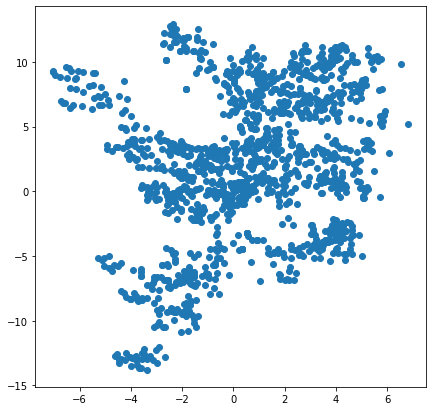

In [16]:
plt.figure(figsize = [7, 7])
plt.scatter(df.V1, df.V2);

# Assessment report:

**The data distribution in the graph is not too widespread, neither too centered at one place, therefore it is worth trying to computing K-Means on this dataset.**

**There is no obvious cluster in spherical shapes so we should expect the K-Means model won't work perfectly here.**

# K-Means Clustering

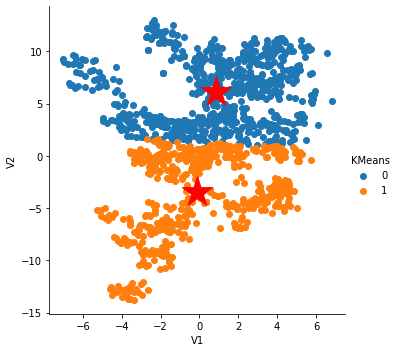

In [17]:
# Step 4: Implementing K-Means Clustering

from sklearn.cluster import KMeans

data = np.column_stack(( df.V1, df.V2))  # we use only V1 and V2

# compute K-Means
km_res = KMeans(n_clusters = 2).fit(data)
clusters = km_res.cluster_centers_

# put the assigned labels to the original dataset
df['KMeans'] = km_res.labels_

#plot out the result
g = sb.FacetGrid(data = df, hue = 'KMeans', height = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend();
plt.scatter(clusters[:,0], clusters[:,1], s=1000, marker='*', c='r')

**To make sure the K-Means model is stable in this dataset. We run it several time to see if we get similar results.**

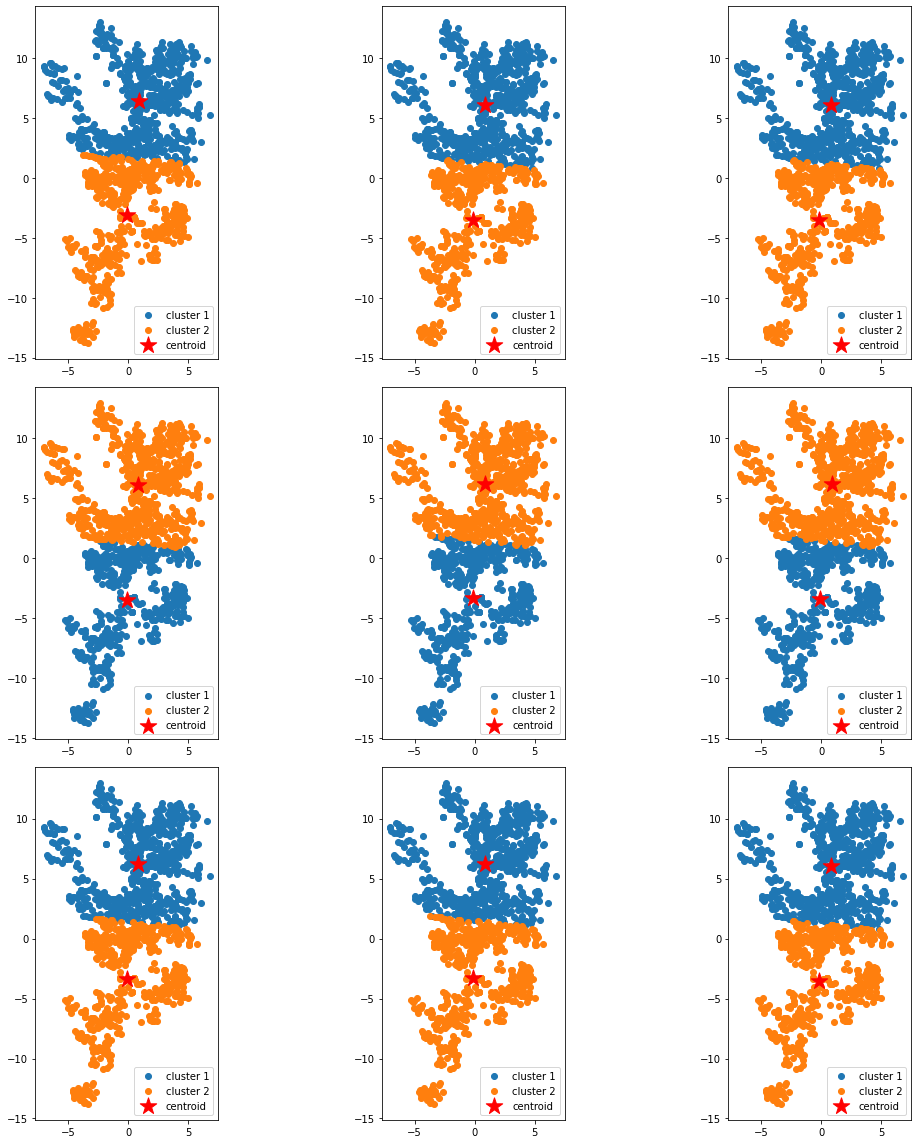

In [18]:
# Step 5After running K-Means for 9 times, the results we got are very similar, which means the K-Means here is stable.: Model Re-testing to check for stable results
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2,
                max_iter=3)
    km.fit(data)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(data[km.labels_ == 0, 0], data[km.labels_ == 0, 1],
                   label='cluster 1')
    ax[i].scatter(data[km.labels_ == 1, 0], data[km.labels_ == 1, 1],
                   label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].legend(loc='lower right')
    ax[i].set_aspect('equal')
plt.tight_layout()

After running K-Means for 9 times, the results we got are very similar, which means the K-Means here is stable.

# Analyze the K-Means computing results

In [19]:
# Step 6: Analysing the computing reports

km_res.cluster_centers_

array([[ 0.86740881,  6.10864373],
       [-0.12591358, -3.47998851]])

In [20]:
df['KMeans'] = km_res.labels_
df.groupby('KMeans').describe()

V1                                                               \
        count      mean       std     min     25%      50%     75%     max   
KMeans                                                                       
0       777.0  0.861596  2.906934 -7.0421 -0.9607  1.10500  3.1896  6.8248   
1       595.0 -0.125001  2.657200 -5.2943 -2.2031 -0.65767  2.0159  5.7403   

           V2                                                                  \
        count      mean       std      min     25%     50%       75%      max   
KMeans                                                                          
0       777.0  6.084358  3.107177   0.9829  3.2322  6.1292  8.790300  12.9516   
1       595.0 -3.512735  3.826480 -13.7731 -6.3144 -3.0087 -0.087954   1.6327   

           V3                                                                 \
        count      mean       std     min      25%     50%      75%      max   
KMeans                                                                         
0       777.0 -1.016291  2.357097 -5.2861 -3.00870 -0.9351  0.57551   7.7618   
1       595.0  4.549920  4.247547 -2.6411  1.37835  3.6935  7.51375  17.9274   

           V4                                                                  \
        count      mean       std     min       25%      50%      75%     max   
KMeans                                                                          
0       777.0 -2.126803  2.235394 -8.5482 -3.858200 -1.71290 -0.38751  2.1547   
1       595.0  0.029535  1.011275 -3.3202 -0.534275  0.11033  0.75235  2.4495   

        Class                                               
        count      mean       std  min  25%  50%  75%  max  
KMeans                                                      
0       777.0  1.317889  0.465956  1.0  1.0  1.0  2.0  2.0  
1       595.0  1.610084  0.488141  1.0  1.0  2.0  2.0  2.0

# Results:

**There are ~600 data being clustered in group 0, and ~77 data being clustering in group 1.**

**For group 1, V1's mean = ~-0.12 and V2's mean = ~-3.5. For group 2, V1's mean = ~0.86 and V2's mean = ~6.1.**

# Evaluate the Clustering Model

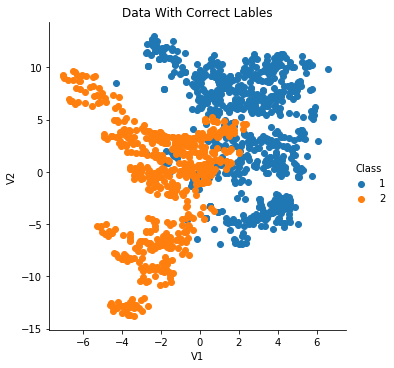

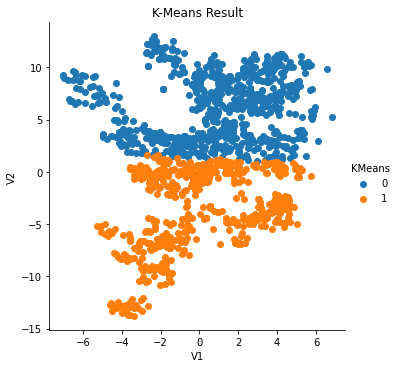

In [21]:
# Step 7: plot the data with Correct labels
g = sb.FacetGrid(data = df, hue = 'Class', height = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()
plt.title("Data With Correct Lables")


# plot the data computed by K-Means
g = sb.FacetGrid(data = df, hue = 'KMeans', height = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()
plt.title("K-Means Result");

# correct the labels
df["KMeans"] = df["KMeans"].map({0: 1, 1: 2})

In [22]:
correct = 0

for i in range(0,1372):
    if df.Class[i] == df["KMeans"][i]:
        correct+=1
print(correct/1371)

0.6513493800145879


**The accuracy of this K-Means Model is 65.2%**